In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('roas_matured_ccp.csv')
# df = df.fillna(0)
df.head()

,ad_id,source,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
0,120200176763890164,fb,"12 October, 2023","29 November, 2023",49,"22,513.79","1,382,232","6,264",0.453180,678,77.58,14.01,50.29,0.0,"42,300",1.88
1,120200380862490164,fb,"13 October, 2023","8 November, 2023",8,656.17,"16,037",93,0.579909,0,NaN,NaN,NaN,NaN,0,0
2,120200382263810164,fb,"13 October, 2023","7 November, 2023",15,944.19,"16,955",86,0.507225,0,NaN,NaN,NaN,NaN,0,0
3,120200382328750164,fb,"13 October, 2023","16 October, 2023",4,65.08,751,6,0.800000,0,NaN,NaN,NaN,NaN,0,0
4,120200449814490164,fb,"14 October, 2023","2 November, 2023",15,553.32,"23,049",64,0.277669,10,100.00,50.00,10.00,0.0,0,0


In [6]:
df.spend = df.spend.str.replace(',','').astype(float)
df.clicks = df.clicks.str.replace(',','').astype(int)
df.impressions = df.impressions.str.replace(',','').astype(int)
df.revenue = df.revenue.str.replace(',','').astype(float)
df.n_leads = df.n_leads.str.replace(',','').astype(int)
df.roas = df.roas.str.replace(',','').astype(float)
df.ad_start = pd.to_datetime(df.ad_start, format= '%d %B, %Y')
df.ad_end = pd.to_datetime(df.ad_end, format= '%d %B, %Y')

In [7]:
df.describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,2.491000e+03,2491,2491,2491.000000,2491.000000,2.491000e+03,2491.000000,2491.000000,2491.000000,1219.000000,1219.000000,1219.000000,1219.000000,2.491000e+03,2491.000000
mean,5.603600e+16,2024-01-08 04:12:37.286230272,2024-01-30 17:39:37.358490624,18.932156,5550.383837,3.154365e+05,1689.989161,0.562570,144.104376,78.651436,26.972822,29.277074,19.870156,2.406075e+04,5.924877
min,6.337419e+11,2022-11-16 00:00:00,2022-11-16 00:00:00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,6.972999e+11,2023-09-08 00:00:00,2023-09-13 00:00:00,4.000000,95.005000,2.924500e+03,14.000000,0.317013,0.000000,72.715000,16.670000,2.345000,0.000000,0.000000e+00,0.000000
50%,2.385748e+16,2024-01-22 00:00:00,2024-02-11 00:00:00,11.000000,508.350000,1.829400e+04,87.000000,0.460000,0.000000,81.520000,25.120000,14.290000,0.000000,0.000000e+00,0.000000
75%,1.202076e+17,2024-05-07 00:00:00,2024-05-30 00:00:00,26.000000,2663.985000,1.214325e+05,574.500000,0.666549,22.000000,90.000000,33.330000,50.000000,41.540000,0.000000e+00,0.000000
max,1.202139e+17,2024-11-07 00:00:00,2024-11-11 00:00:00,179.000000,408694.510000,2.277195e+07,135588.000000,13.730000,13671.000000,100.000000,100.000000,100.000000,100.000000,1.727988e+06,7046.980000
std,5.473935e+16,NaN,NaN,21.375337,18505.980520,1.195617e+06,7071.170610,0.638879,661.955617,19.590857,19.862838,33.449318,24.956953,1.101731e+05,143.147330


In [8]:
df[df.roas==0].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,1.884000e+03,1884,1884,1884.000000,1884.000000,1.884000e+03,1884.000000,1884.000000,1884.000000,612.000000,612.000000,612.000000,612.000000,1884.0,1884.0
mean,5.515395e+16,2023-12-11 02:52:44.331210240,2023-12-28 21:43:56.942675200,13.875265,1972.499776,7.877307e+04,488.282378,0.563090,5.954352,77.487467,26.012075,27.701618,14.259739,0.0,0.0
min,6.337419e+11,2022-11-16 00:00:00,2022-11-16 00:00:00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,7.030002e+11,2023-07-19 00:00:00,2023-08-10 18:00:00,3.000000,52.402500,1.605250e+03,6.000000,0.284858,0.000000,66.670000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.385745e+16,2023-12-21 00:00:00,2024-01-04 00:00:00,8.000000,248.645000,8.043000e+03,38.000000,0.466029,0.000000,83.330000,23.305000,11.435000,0.000000,0.0,0.0
75%,1.202059e+17,2024-03-31 12:00:00,2024-05-13 00:00:00,16.250000,942.857500,3.317325e+04,161.000000,0.675410,2.000000,100.000000,34.337500,50.000000,29.415000,0.0,0.0
max,1.202139e+17,2024-11-07 00:00:00,2024-11-11 00:00:00,179.000000,256746.350000,1.095795e+07,110971.000000,13.730000,398.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0
std,5.303077e+16,NaN,NaN,17.627943,10381.655069,4.320261e+05,3347.180250,0.698595,24.108976,25.394955,25.482733,34.320807,24.861716,0.0,0.0


In [9]:
df[(df.roas <= 1) & (df.roas>0)].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,6.300000e+01,63,63,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,4.577889e+16,2024-01-27 02:17:08.571428608,2024-03-14 22:05:42.857142784,45.603175,24571.833968,1.936112e+06,11954.333333,0.713529,880.555556,71.928889,23.226508,20.969524,17.366349,16804.761905,0.680125
min,6.733674e+11,2023-09-09 00:00:00,2023-10-29 00:00:00,6.000000,821.410000,4.748600e+04,152.000000,0.022299,6.000000,27.830000,9.470000,0.000000,0.000000,500.000000,0.043963
25%,6.913031e+11,2023-11-02 00:00:00,2024-01-19 00:00:00,30.500000,5227.645000,2.485970e+05,1024.500000,0.361487,77.500000,69.105000,19.145000,7.345000,0.000000,3000.000000,0.551229
50%,6.951280e+11,2024-02-20 00:00:00,2024-04-09 00:00:00,40.000000,9353.160000,5.107300e+05,2582.000000,0.485965,196.000000,71.700000,22.950000,14.870000,0.000000,5000.000000,0.737685
75%,1.202047e+17,2024-03-23 00:00:00,2024-04-24 00:00:00,56.000000,19760.455000,1.148882e+06,5931.500000,0.719984,651.000000,78.095000,27.105000,25.345000,40.835000,15750.000000,0.860954
max,1.202129e+17,2024-10-15 00:00:00,2024-11-04 00:00:00,111.000000,174873.470000,2.277195e+07,135588.000000,5.560000,9651.000000,93.260000,41.670000,86.710000,100.000000,162000.000000,1.000000
std,5.724244e+16,NaN,NaN,22.609261,38355.819798,4.113162e+06,24807.918912,0.849219,1858.588163,11.530797,7.366860,21.833922,27.808974,30008.150391,0.241993


In [10]:
df[(df.roas > 1) & (df.roas<10)].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,3.740000e+02,374,374,374.000000,374.000000,3.740000e+02,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,5.482936e+16,2024-03-13 13:17:00.320855808,2024-04-19 04:52:37.219251456,34.807487,17205.667433,1.049391e+06,5213.914439,0.556783,593.994652,78.584251,26.461444,29.750356,21.690134,58472.778075,3.951230
min,6.769824e+11,2023-09-23 00:00:00,2023-10-25 00:00:00,2.000000,148.370000,5.394000e+03,0.000000,0.000000,1.000000,8.330000,0.000000,0.000000,0.000000,1000.000000,1.020000
25%,6.911750e+11,2024-01-06 00:00:00,2024-02-08 06:00:00,15.250000,2627.065000,1.341900e+05,589.750000,0.370260,52.000000,74.385000,20.487500,6.857500,0.000000,8000.000000,1.980000
50%,7.095327e+11,2024-03-02 00:00:00,2024-05-06 00:00:00,31.000000,7070.515000,3.888355e+05,1873.000000,0.450098,191.000000,79.375000,26.015000,15.790000,0.000000,22500.000000,3.235000
75%,1.202081e+17,2024-05-13 00:00:00,2024-06-08 00:00:00,49.000000,19953.975000,1.220762e+06,5498.250000,0.644071,605.500000,83.870000,31.080000,54.992500,42.860000,60375.000000,5.597500
max,1.202132e+17,2024-10-17 00:00:00,2024-11-11 00:00:00,110.000000,408694.510000,1.784949e+07,135108.000000,2.930000,13671.000000,100.000000,75.000000,100.000000,100.000000,681500.000000,9.940000
std,5.953928e+16,NaN,NaN,23.570221,31464.311713,1.867325e+06,10670.426004,0.334707,1223.731307,9.720799,9.667875,30.725347,23.792767,93003.849578,2.363753


In [11]:
df[df.roas>=10].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,1.700000e+02,170,170,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000
mean,7.226697e+16,2024-06-16 06:04:14.117647104,2024-07-21 08:53:38.823529472,30.164706,12511.008235,7.229201e+05,3451.247059,0.513595,412.452941,85.480824,32.944882,36.986176,36.991588,2.176931e+05,77.872118
min,6.865536e+11,2023-10-05 00:00:00,2023-10-25 00:00:00,1.000000,2.980000,6.400000e+01,1.000000,0.199760,1.000000,15.630000,0.000000,0.000000,0.000000,1.500000e+03,10.150000
25%,7.072455e+11,2024-05-13 00:00:00,2024-06-16 00:00:00,12.250000,993.367500,3.846375e+04,187.500000,0.376938,22.000000,82.217500,24.872500,4.975000,36.712500,3.250000e+04,13.310000
50%,1.202100e+17,2024-06-29 00:00:00,2024-08-04 00:00:00,23.000000,3949.320000,1.924865e+05,830.000000,0.454045,100.500000,86.210000,31.165000,13.145000,41.570000,9.350000e+04,17.940000
75%,1.202113e+17,2024-08-07 18:00:00,2024-09-15 00:00:00,40.500000,10812.335000,5.570480e+05,3000.750000,0.555891,317.250000,90.000000,38.140000,82.905000,44.690000,2.240000e+05,33.010000
max,1.202136e+17,2024-10-23 00:00:00,2024-11-11 00:00:00,149.000000,131724.420000,1.085111e+07,54639.000000,1.560000,8305.000000,100.000000,100.000000,100.000000,100.000000,1.727988e+06,7046.980000
std,5.892029e+16,NaN,NaN,24.919680,22210.377364,1.454978e+06,6987.516601,0.230882,970.503298,10.416668,14.982672,38.099824,17.394812,3.355730e+05,544.317505


In [13]:
df['inbounds_ratio'] = df.inbounded_perc/100
df['high_leads_ratio'] = df.high_leads_perc/100
df['adults_ratio'] = df.adult_leads_perc/100
df['connected_call_ratio'] = df.connected_call_perc/100
# df['z3_ratio'] = df.z3_coverage/100

In [30]:
df['impressions_per_day_per_spend'] = (df.impressions/df.spend/df.days_active)
df['lead_to_click_ratio'] = df.n_leads/df.clicks
df_cleaned = df.drop(columns = ['ad_id','source','ad_start','ad_end','days_active','spend','impressions','clicks','n_leads','connected_call_perc','inbounded_perc','high_leads_perc','adult_leads_perc'])
# df_cleaned = df_cleaned.replace(np.nan,0)
df_cleaned = df_cleaned.replace(np.inf,np.nan)
df_cleaned = df_cleaned.dropna()

In [34]:
df_nz = df_cleaned[(df_cleaned.roas > 0)]

In [15]:
roas = df_cleaned.pop('roas')
revenue = df_cleaned.pop('revenue')

In [35]:
roas = df_nz.pop('roas')
revenue = df_nz.pop('revenue')

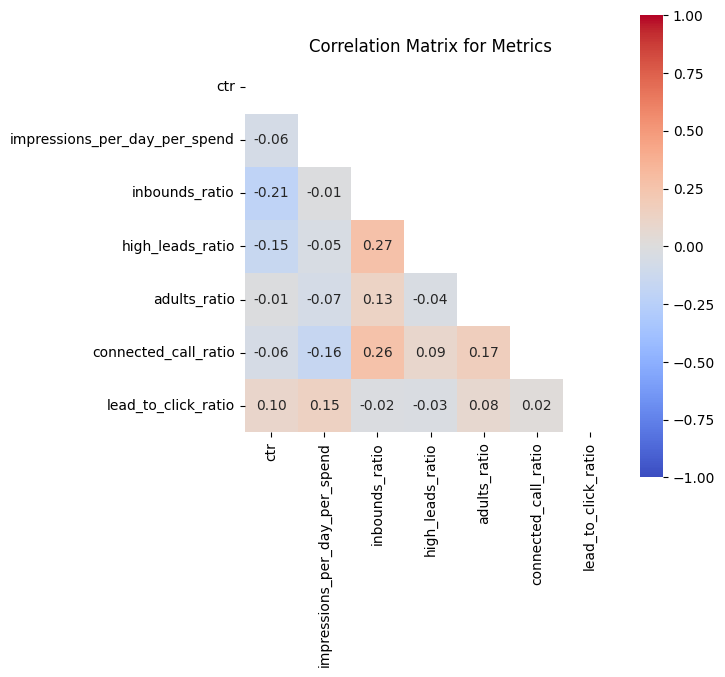

In [36]:
corrs = df_nz.corr()
mask = np.triu(np.ones_like(corrs, dtype = bool))
plt.figure(figsize=(6,6))
sns.heatmap(corrs.where(~mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f")
plt.title("Correlation Matrix for Metrics")
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif = pd.DataFrame()
    vif['features'] = pd.Series(df.columns)
    vif['VIF_values'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    return vif.sort_values(by='VIF_values').reset_index(drop=True)

compute_vif(df_cleaned)

,features,VIF_values
0,lead_to_click_ratio,1.018340
1,impressions_per_day_per_spend,1.436159
2,adults_ratio,1.774081
3,connected_call_ratio,1.778202
4,ctr,1.852082
5,high_leads_ratio,2.859790
6,inbounds_ratio,5.573900


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [28]:
# Split the data into training and testing sets
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas .reset_index(drop=True)
# X_train = X 
# y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model with training data
model = sm.OLS(y_train, X_train_const).fit()

y_est = model.predict(X_train_const)

mse_train = mean_squared_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"R^2 score = {model.rsquared_adj:.4f}")
print(f"f-Statistic = {model.fvalue:.4f}")
print(f"Overall p-value = {model.f_pvalue:.4f}")

coefficients_df = pd.DataFrame({
    'Variable': model.params.index,
    'Std Coeff': model.params.values,
    'P-Value': model.pvalues.values
})
print("\nVariables by Order of Signifcance are:")
print(coefficients_df.sort_values(by='P-Value'))

y_pred = model.predict(X_test_const)
# Evaluate the performance on the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score

# Print metrics
print("\nTest Data Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")



Train Data Results:
Mean Squared Error = 0.0317
R^2 score = 0.0257
f-Statistic = 4.6643
Overall p-value = 0.0000

Variables by Order of Signifcance are:
                        Variable  Std Coeff   P-Value
0                          const  -0.025076  0.000043
6           connected_call_ratio   0.018552  0.001938
5                   adults_ratio   0.016177  0.006740
3                 inbounds_ratio   0.009768  0.104692
2  impressions_per_day_per_spend   0.007419  0.190024
7            lead_to_click_ratio   0.087261  0.196654
4               high_leads_ratio   0.002980  0.610187
1                            ctr  -0.000153  0.977259

Test Data Results:
Mean Squared Error (MSE): 4.0410
R^2 Score: 0.1675


In [21]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Assuming df_cleaned is your feature DataFrame and its columns correspond to feature names
feature_names = df_cleaned.columns

# Extract Gini importance
importances = model.feature_importances_

# Combine feature names and importances into a sorted list
importances = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True),columns = ['Variable', 'Significance (Gini Coeff)'])

# Print feature importances
y_est = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_est)
r2_train = r2_score(y_train,y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
# print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")

print("Variable Importances:")
importances
# Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the performance on the test set
# mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
# rmse = mse ** 0.5  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R^2 score

# # Print metrics
# print("\n Test Data Results:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R^2 Score: {r2:.4f}")




Train Data Results:
Mean Squared Error = 0.0001
R^2 score = 0.8823
Variable Importances:


,Variable,Significance (Gini Coeff)
0,lead_to_click_ratio,0.706463
1,connected_call_ratio,0.116882
2,high_leads_ratio,0.087377
3,impressions_per_day_per_spend,0.035527
4,ctr,0.022552
5,adults_ratio,0.019627
6,inbounds_ratio,0.011571


In [23]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
# y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
X = df_cleaned
y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Lasso(alpha=0.07)  # Regularization strength
model.fit(X, y)

# mse_train = mean_squared_error(y_train, y_est)
# r2_train = r2_score(y_train,y_est)

# print("\nTrain Data Results:")
# print("Mean Squared Error = %.4f"%(mse_train))
# # print(f"Root Mean Squared Error = {rmse_train:.4f}")
# print(f"R^2 score = {r2_train:.4f}")

importances = pd.DataFrame(sorted(zip(df_cleaned.columns, model.coef_), key=lambda x: x[1], reverse=True),columns=['Variable','Significance (Lasso Coeff)'])
print("Variables by Importance are:")
importances

Variables by Importance are:


,Variable,Significance (Lasso Coeff)
0,lead_to_click_ratio,71.001201
1,connected_call_ratio,11.223734
2,inbounds_ratio,9.583346
3,ctr,2.898841
4,high_leads_ratio,2.671805
5,impressions_per_day_per_spend,0.109464
6,adults_ratio,-2.366250
